In [29]:
import pandas as pd 
import numpy as np 
import pyodbc 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import json

import warnings
warnings.filterwarnings("ignore")

In [30]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=MYDEVICE;'
    'DATABASE=sales;'
    'Trusted_Connection=yes;'
)


In [31]:
conn = pyodbc.connect(conn_str)

In [32]:
query = "SELECT * FROM dbo.cards_data"
df = pd.read_sql(query, conn)

df 

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.0,01/1991,2014,No
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.0,01/1994,2013,No
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.0,01/1995,2011,No
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.0,01/1995,2015,No
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.0,01/1997,2007,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.0,12/2019,2019,No
6142,6142,1236,Mastercard,Debit,5791756986936871,11/2024,196,True,1,12223.0,12/2019,2019,No
6143,6143,253,Mastercard,Debit,5482273460029161,07/2024,79,False,1,24690.0,12/2019,2019,No
6144,6144,737,Mastercard,Credit,5413710543564908,10/2024,454,True,1,6600.0,12/2019,2019,No


In [33]:
df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.0,01/1991,2014,No
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.0,01/1994,2013,No
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.0,01/1995,2011,No
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.0,01/1995,2015,No
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.0,01/1997,2007,No


In [34]:
df.tail()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.0,12/2019,2019,No
6142,6142,1236,Mastercard,Debit,5791756986936871,11/2024,196,True,1,12223.0,12/2019,2019,No
6143,6143,253,Mastercard,Debit,5482273460029161,07/2024,79,False,1,24690.0,12/2019,2019,No
6144,6144,737,Mastercard,Credit,5413710543564908,10/2024,454,True,1,6600.0,12/2019,2019,No
6145,6145,682,Visa,Debit,4605950682175499,08/2020,517,True,1,16047.0,12/2019,2019,No


In [35]:
df.shape

(6146, 13)

In [36]:
df.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

In [37]:
df.describe()

,id,client_id,card_number,cvv,num_cards_issued,credit_limit,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,14347.493980,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,12014.463884,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,0.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,7042.750000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,12592.500000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,19156.500000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,151223.000000,2020.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   int64  
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   bool   
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   float64
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 582.3+ KB


In [39]:
df.describe(include="O")

,card_brand,card_type,expires,acct_open_date,card_on_dark_web
count,6146,6146,6146,6146,6146
unique,4,3,259,303,1
top,Mastercard,Debit,02/2020,02/2020,No
freq,3209,3511,377,607,6146


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.isna().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [42]:
df["card_brand"].value_counts()

card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64

In [43]:
df["card_type"].value_counts()

card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64

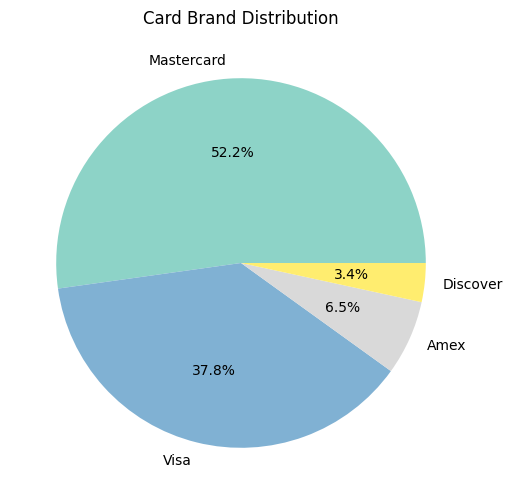

In [44]:
# Pie chart of card brands
df["card_brand"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    figsize=(6,6), 
    colormap="Set3"
)

plt.title("Card Brand Distribution")
plt.ylabel("")
plt.show()


In [45]:
num_cards_type = df.groupby(['card_brand','card_type'])['num_cards_issued'].count().reset_index(name='count')
num_cards_type

,card_brand,card_type,count
0,Amex,Credit,402
1,Discover,Credit,209
2,Mastercard,Credit,635
3,Mastercard,Debit,2191
4,Mastercard,Debit (Prepaid),383
5,Visa,Credit,811
6,Visa,Debit,1320
7,Visa,Debit (Prepaid),195


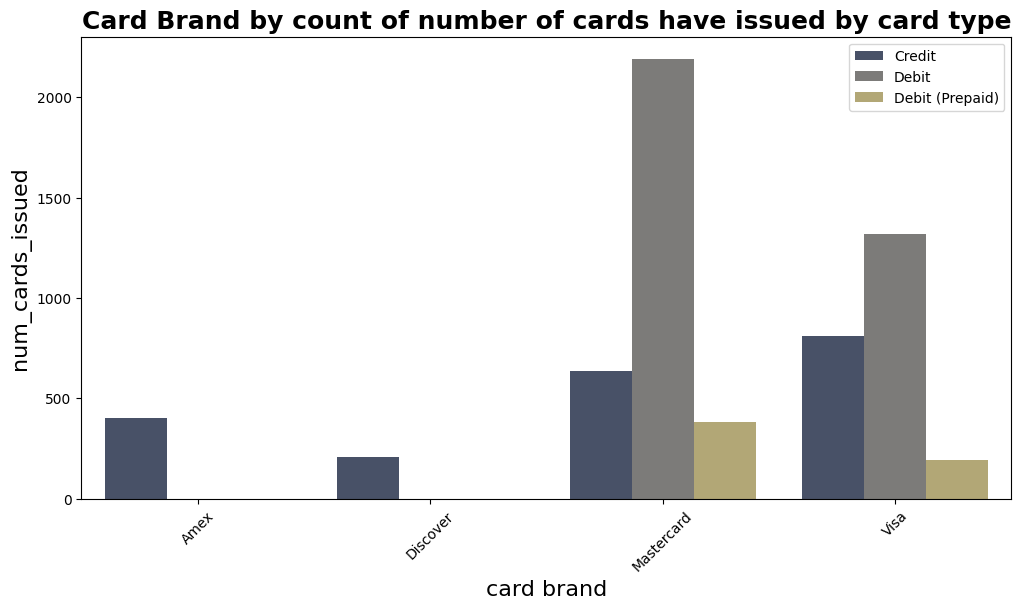

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=num_cards_type['card_brand'],y=num_cards_type['count'],hue=num_cards_type['card_type'],palette='cividis')
plt.title('Card Brand by count of number of cards have issued by card type', fontweight='bold',fontsize=18)
plt.xlabel('card brand',fontsize=16)
plt.ylabel('num_cards_issued',fontsize=16)
plt.xticks(rotation =45)
plt.legend()
plt.show()

In [47]:
brand_cards_limit = df.groupby(['card_brand','card_type'])['credit_limit'].mean().reset_index(name='AVG')
brand_cards_limit

,card_brand,card_type,AVG
0,Amex,Credit,11436.318408
1,Discover,Credit,10816.267943
2,Mastercard,Credit,10971.653543
3,Mastercard,Debit,18279.711091
4,Mastercard,Debit (Prepaid),64.778068
5,Visa,Credit,11295.561036
6,Visa,Debit,19019.621212
7,Visa,Debit (Prepaid),63.800000


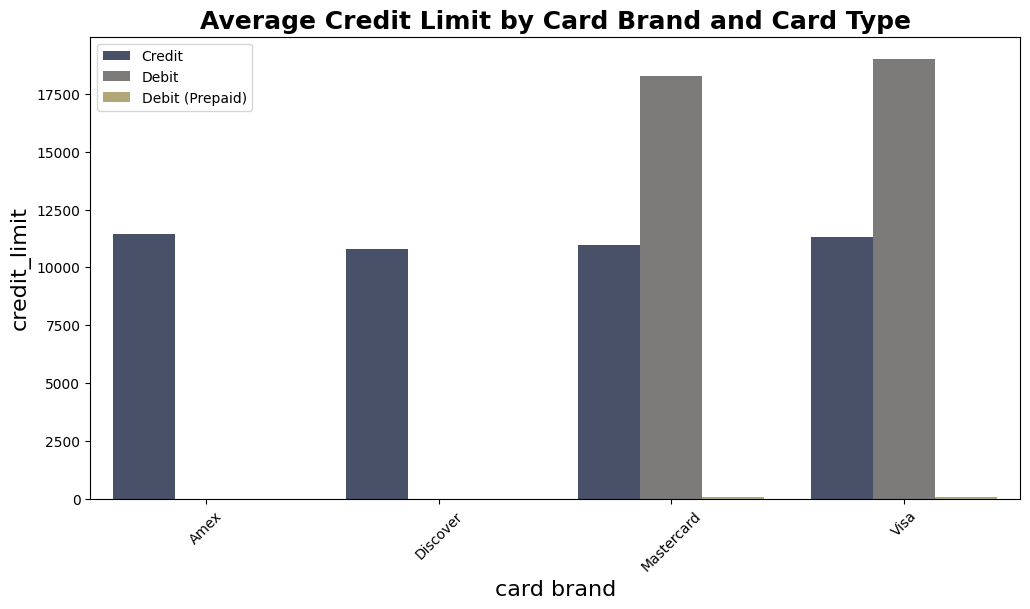

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x=brand_cards_limit['card_brand'],y=brand_cards_limit['AVG'],hue=brand_cards_limit['card_type'],palette='cividis')
plt.title('Average Credit Limit by Card Brand and Card Type', fontweight='bold',fontsize=18)
plt.xlabel('card brand',fontsize=16)
plt.ylabel('credit_limit',fontsize=16)
plt.xticks(rotation =45)
plt.legend()
plt.show()

In [49]:
count_chip_brand =  df.groupby(['card_brand','card_type'])['has_chip'].count().reset_index(name='count')
count_chip_brand

,card_brand,card_type,count
0,Amex,Credit,402
1,Discover,Credit,209
2,Mastercard,Credit,635
3,Mastercard,Debit,2191
4,Mastercard,Debit (Prepaid),383
5,Visa,Credit,811
6,Visa,Debit,1320
7,Visa,Debit (Prepaid),195


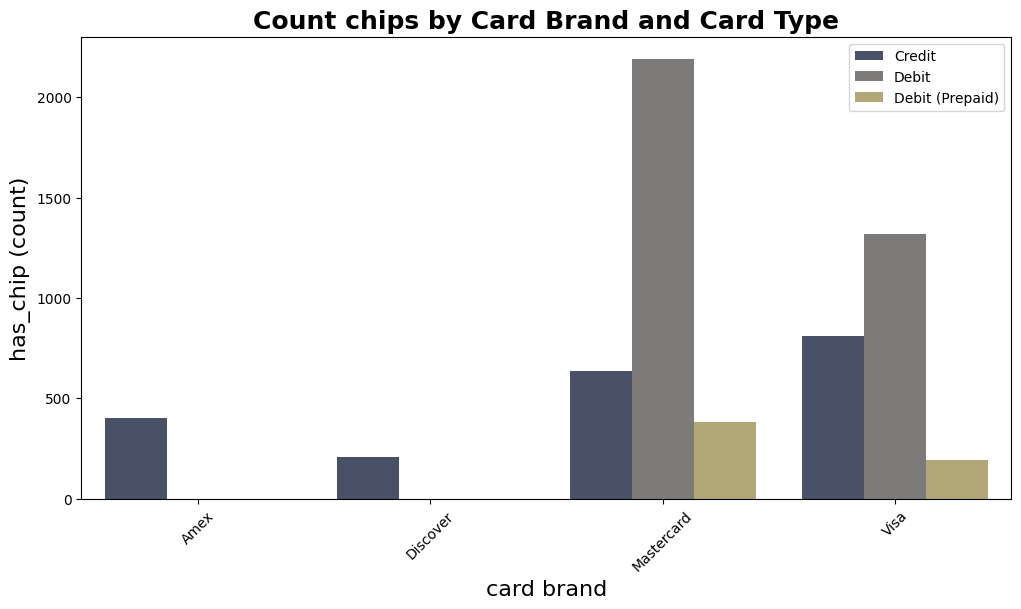

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x=count_chip_brand['card_brand'],y=count_chip_brand['count'],hue=count_chip_brand['card_type'],palette='cividis')
plt.title('Count chips by Card Brand and Card Type', fontweight='bold',fontsize=18)
plt.xlabel('card brand',fontsize=16)
plt.ylabel('has_chip (count)',fontsize=16)
plt.xticks(rotation =45)
plt.legend()
plt.show()

In [51]:
df['year_pin_last_changed'].unique()

array([2014, 2013, 2011, 2015, 2007, 2012, 2006, 2005, 2009, 2020, 2010,
       2003, 2017, 2019, 2004, 2016, 2008, 2018, 2002])